[**Demo %s**](#demo-structure-sparseband)


```{index} ! MATLAB; spdiags
```

The `spdiags` function creates a sparse matrix given its diagonal elements. The main or central diagonal is numbered zero, above and to the right of that is positive, and below and to the left is negative.

In [2]:
n = 50;
n = 50;
% Put constant values on 3 diagonals
A = spdiags([n, 1, 0.1], [-3, 0, 5], n, n);
% Put other values on 1st superdiagonal
A = spdiags(-(0:n-1)', 1, A);
full(A(1:7, 1:7))

ans = 7×7 double
    1.0000   -1.0000         0         0         0    0.1000         0
         0    1.0000   -2.0000         0         0         0    0.1000
         0         0    1.0000   -3.0000         0         0         0
   50.0000         0         0    1.0000   -4.0000         0         0
         0   50.0000         0         0    1.0000   -5.0000         0
         0         0   50.0000         0         0    1.0000   -6.0000
         0         0         0   50.0000         0         0    1.0000

```{index} ! MATLAB; sparse
```

Without pivoting, the LU factors have the same lower and upper bandwidth as the original matrix.
```{tip}
:class: dropdown
The `sparse` function converts any matrix to sparse form. But it's usually better to construct a sparse matrix directly, as the standard form might not fit in memory.
```

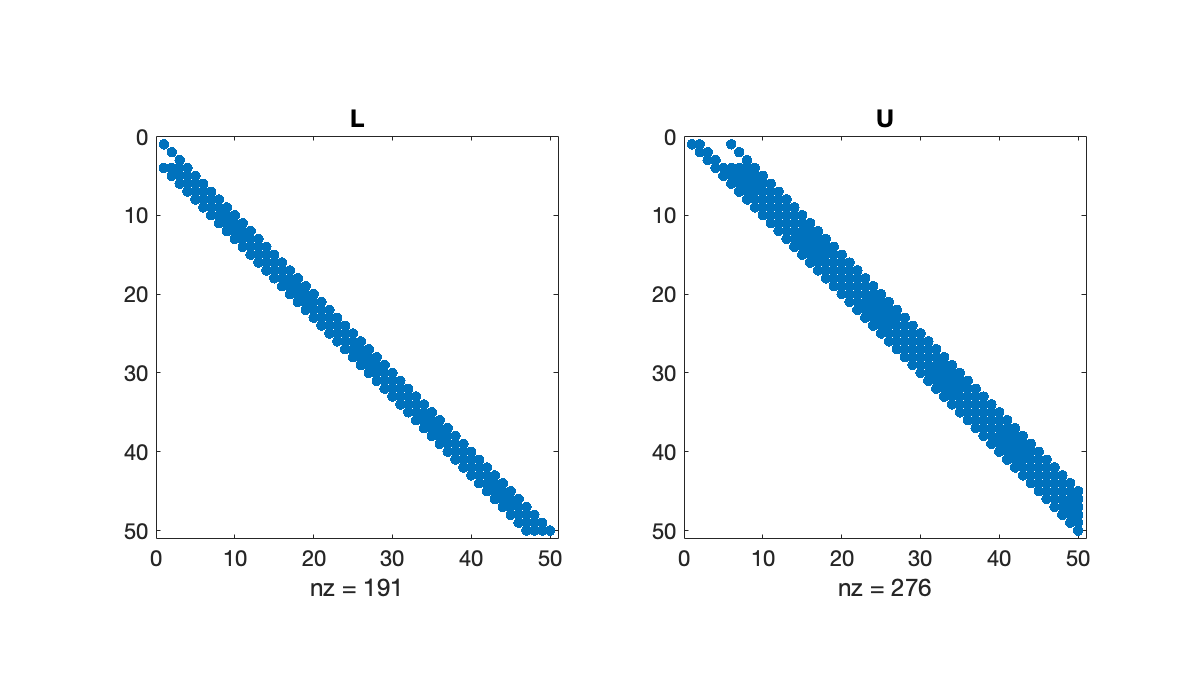

In [3]:
[L, U] = lufact(A);
clf
subplot(1, 2, 1), spy(L), title('L')
subplot(1, 2, 2), spy(U), title(('U'));

However, if we introduce row pivoting, bandedness may be expanded or destroyed.

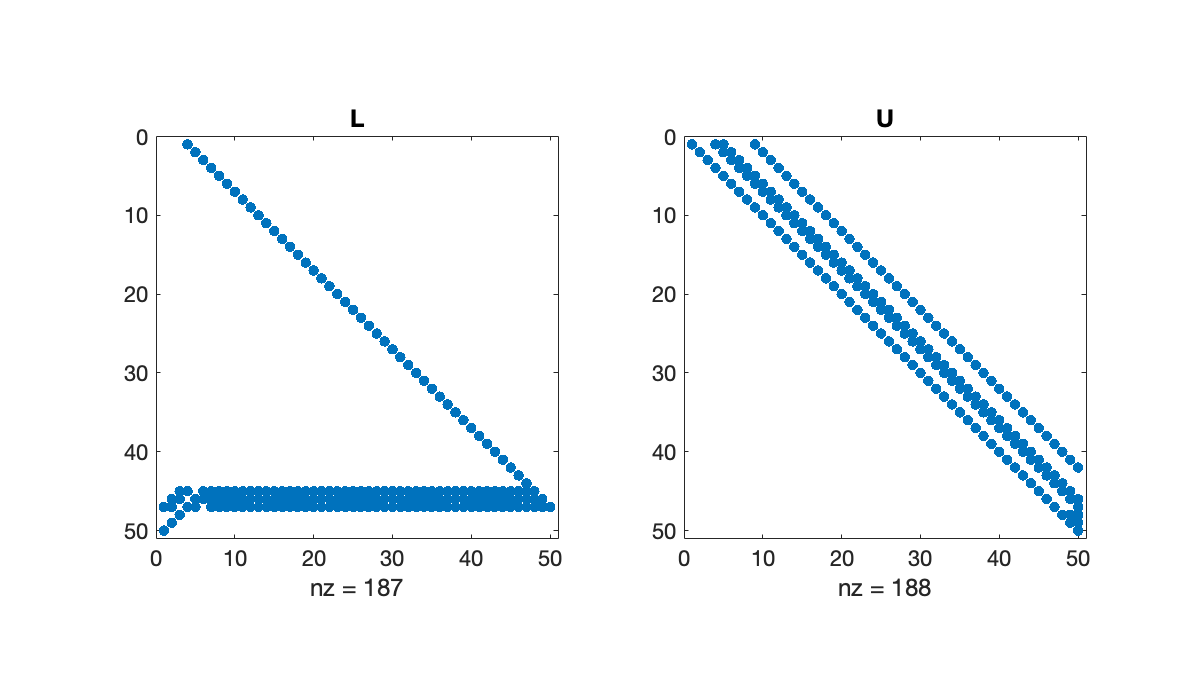

In [4]:
[L, U, p] = plufact(A);
subplot(1, 2, 1), spy(L(p, :)), title('L')
subplot(1, 2, 2), spy(U), title(('U'));